# Stock Prediction using Support Vector Regressors

In this notebook, we try to predict price of an asset (say, AAPL's stock price) n days in the future, from today's closing price , using a regression algorithm, called Support Vector Regressor (SVR)

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import yfinance as yf

yf.pdr_override()

In [2]:
df = web.get_data_yahoo('AAPL', start='2012-05-01', end='2018-03-27')
df = df[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [3]:
forecast_out = 3
df['Prediction'] = df[['Adj Close']].shift(-forecast_out)

X = df[['Adj Close']][:-forecast_out].values
Y = df['Prediction'][:-forecast_out].values

/tmp/ipykernel_5025/143912470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Adj Close']].shift(-forecast_out)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [6]:
svr_conf = svr_rbf.score(x_test, y_test)
svr_conf

0.9929398291792585

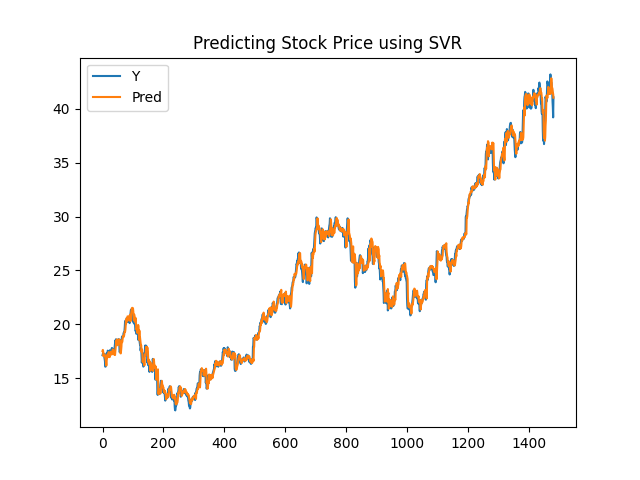

In [7]:
pred = svr_rbf.predict(X)
plt.figure()
plt.plot(Y)
plt.plot(pred)
plt.legend(['Y', 'Pred'])
plt.title('Predicting Stock Price using SVR')
plt.show()